In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

First, we load in our dataset

In [3]:
df = pd. read_csv('AviationData.csv', encoding = 'latin1', low_memory = False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Let's clean up any unnecessary punctuation, spaces, and fix capitalization for column names.

In [4]:
#Replace periods in all the column names
df.columns = df.columns.str.replace('.', ' ', regex=False)

In [5]:
#Fixing the capitalization for column names
df.columns = df.columns.str.title()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

Let's start exploring each column to identify any duplicate values, missing values, and unnecessary columns/rows.

In [7]:
df['Weather Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather Condition, dtype: int64

In [8]:
#There are two columns for unknowns. Let's consolidate into one.
df['Weather Condition'] = df['Weather Condition'].str.replace('Unk','UNK')

In [9]:
df['Weather Condition'].value_counts()

VMC    77303
IMC     5976
UNK     1118
Name: Weather Condition, dtype: int64

In [10]:
# The publication date for these reports are not useful to us. The event date 
## is enough for us to track the times of these accidents.
df = df.drop('Publication Date', axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

In [12]:
df['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [13]:
# Since the schedule status for flights does not contribute anyway to safety
## of flights we can drop this column.

df = df.drop('Schedule', axis = 1)

In [14]:
#We will be focusing on the make and model of each plane so we can do without
#   knowing the Air Carriers.

df = df.drop('Air Carrier', axis = 1)

In [15]:
# There's more missing values than existing values for the Latitude and Longitude columns
## Since we have the cities, countries, and airports to pinpoint locations of flights,
### let's get ride of these 2 columns.

df['Latitude'].isna().value_counts()
df['Longitude'].isna().value_counts()

True     54516
False    34373
Name: Longitude, dtype: int64

In [16]:
df = df.drop('Latitude', axis=1)
df = df.drop('Longitude', axis=1)

In [17]:
# Amateur Built aircrafts are homebuilt aircrafts or kit planes constructed by
## individuals for personal use or education rather than professional activity.
### We only want professionaly built aircrafts for our purposes, so we can get rid of any
#### aircrafts that are Amateur Built.

df = df.drop(df[df['Amateur Built'] == 'Yes'].index)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80414 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80414 non-null  object 
 1   Investigation Type      80414 non-null  object 
 2   Accident Number         80414 non-null  object 
 3   Event Date              80414 non-null  object 
 4   Location                80363 non-null  object 
 5   Country                 80194 non-null  object 
 6   Airport Code            45083 non-null  object 
 7   Airport Name            47411 non-null  object 
 8   Injury Severity         79415 non-null  object 
 9   Aircraft Damage         77249 non-null  object 
 10  Aircraft Category       28740 non-null  object 
 11  Registration Number     79134 non-null  object 
 12  Make                    80366 non-null  object 
 13  Model                   80345 non-null  object 
 14  Amateur Built           80312 non-null

In [19]:
df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1901
Turbo Jet            690
None                  18
Geared Turbofan       12
Electric              10
LR                     2
NONE                   1
Hybrid Rocket          1
UNK                    1
Name: Engine Type, dtype: int64

Let's take a deep dive into these engine types to figure out which engines are suitable for our corporate and business aviation purposes.

1. Reciprocating (a.k.a. piston) engines are used for general aviation because they're affordable, robust, and have good fuel efficiency. They're also used for corporate aviation and are best for flying at lower altitudes. **We'll keep this one!**

2. Turbo Shaft engines are used in helicopters and large commercial aircrafts. **We'll keep this!**

3. Turbo Prop engines are a hybrid of piston and jet ingines that are used in light aircrafts. They're known for their fuel efficiency on short and medium-haul flights. They offer good performance at low altitudes and speeds, and are ideal fo take-off and landing operations at smaller airports. **We'll keep this!**

4. Turbofan engines are commonly used in corporate aircrafts including light to mid-size business jets, and are generally popular for commercial aircrafts. They are known for being compact and fuel efficient. **We'll keep this!**

5. Turbo Jet engines are commonly used in commercial aircrafts and private jets. They are capable of high speeds and take up little space. **We'll keep this!**

6. Geared Turbo Fans are commonly used in commercial aircrafts, a sub-type of Turbofan engines. They are efficient with smaller and faster tubrines. **We'll keep this!**

7. LR engines, or long range engines, are developed for ultra-long-haul routes such as from L.A. to Singapore. This will be useful for our executives. **We'll keep this!**

8. Electric engines are relatively newer to the industry and are mainly used for training flights. They're not yet a common use for the commercial industry though many companies are working on and investing in building these aircrafts. We can drop these values and luckily there's only 10 values to drop. 

9. Hybrid rocket engines are used in rockets, so for obvious reasons we can drop that.

In [20]:
df.drop(df[df['Engine Type'] == 'Hybrid Rocket'].index, inplace = True)
df.drop(df[df['Engine Type'] == 'Electric'].index, inplace = True)

df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1901
Turbo Jet            690
None                  18
Geared Turbofan       12
LR                     2
NONE                   1
UNK                    1
Name: Engine Type, dtype: int64

Now let's consolidate the unknown values.

In [21]:
df['Engine Type'] = df['Engine Type'].str.replace('UNK', 'Unknown')
df['Engine Type'] = df['Engine Type'].str.replace('NONE', 'Unknown')
df['Engine Type'] = df['Engine Type'].str.replace('None', 'Unknown')
df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1921
Turbo Jet            690
Geared Turbofan       12
LR                     2
Name: Engine Type, dtype: int64

In [22]:
# Let's replace the missing values as Unknown.
df['Engine Type'].isna().value_counts()


False    73658
True      6745
Name: Engine Type, dtype: int64

In [23]:
df['Engine Type'] = df['Engine Type'].fillna('Unknown')
df['Engine Type'].value_counts()

Reciprocating      61664
Unknown             8666
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Turbo Jet            690
Geared Turbofan       12
LR                     2
Name: Engine Type, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80403 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80403 non-null  object 
 1   Investigation Type      80403 non-null  object 
 2   Accident Number         80403 non-null  object 
 3   Event Date              80403 non-null  object 
 4   Location                80352 non-null  object 
 5   Country                 80183 non-null  object 
 6   Airport Code            45078 non-null  object 
 7   Airport Name            47405 non-null  object 
 8   Injury Severity         79406 non-null  object 
 9   Aircraft Damage         77238 non-null  object 
 10  Aircraft Category       28729 non-null  object 
 11  Registration Number     79123 non-null  object 
 12  Make                    80355 non-null  object 
 13  Model                   80334 non-null  object 
 14  Amateur Built           80301 non-null

In [25]:
# We won't need the airport codes since we have airport names.
df.drop('Airport Code', axis=1, inplace = True)

In [26]:
# Let's replace missing Location value as Unknown.
df['Location'].isna().value_counts()
df['Location'] = df['Location'].fillna('Unknown')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80403 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80403 non-null  object 
 1   Investigation Type      80403 non-null  object 
 2   Accident Number         80403 non-null  object 
 3   Event Date              80403 non-null  object 
 4   Location                80403 non-null  object 
 5   Country                 80183 non-null  object 
 6   Airport Name            47405 non-null  object 
 7   Injury Severity         79406 non-null  object 
 8   Aircraft Damage         77238 non-null  object 
 9   Aircraft Category       28729 non-null  object 
 10  Registration Number     79123 non-null  object 
 11  Make                    80355 non-null  object 
 12  Model                   80334 non-null  object 
 13  Amateur Built           80301 non-null  object 
 14  Number Of Engines       74617 non-null

In [28]:
# Let's replace any missing Country values with Unknown
df['Country'] = df['Country'].fillna('Unknown')

In [29]:
# Event Date values are currently an object, let's transform them into datetime types
df['Event Date'] = pd.to_datetime(df['Event Date'])

In [33]:
# Injury Severity has Fatal values with different names. Let's rename any values that 
# start with Fatal to just be called 'Fatal'.
##### *** need code here**** #####
df['Injury Severity'] = df['Injury Severity'].apply(lambda x: 'Fatal' if 'Fatal' in str(x) else x)

In [40]:
df['Injury Severity'].fillna('Unavailable', inplace=True)
df['Injury Severity'].value_counts()


Fatal          76773
Incident        2194
Unavailable     1087
Minor            196
Serious          153
Name: Injury Severity, dtype: int64

In [41]:
df['Aircraft Category'].value_counts()

Airplane             24429
Helicopter            3295
Glider                 473
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Name: Aircraft Category, dtype: int64

In [42]:
df = df.drop(df[(df['Aircraft Category'] != 'Airplane')].index)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 5 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                24429 non-null  object        
 1   Investigation Type      24429 non-null  object        
 2   Accident Number         24429 non-null  object        
 3   Event Date              24429 non-null  datetime64[ns]
 4   Location                24429 non-null  object        
 5   Country                 24429 non-null  object        
 6   Airport Name            16011 non-null  object        
 7   Injury Severity         24429 non-null  object        
 8   Aircraft Damage         23155 non-null  object        
 9   Aircraft Category       24429 non-null  object        
 10  Registration Number     24216 non-null  object        
 11  Make                    24426 non-null  object        
 12  Model                   24411 non-null  object

In [44]:
df['Aircraft Damage'].value_counts()
df['Aircraft Damage'].isna().value_counts()
df['Aircraft Damage'] = df['Aircraft Damage'].fillna('Unknown')

In [36]:
df['Purpose Of Flight'].value_counts()


Personal                     13341
Instructional                 3120
Aerial Application            1066
Unknown                        839
Business                       764
Positioning                    350
Aerial Observation             170
Skydiving                      166
Ferry                          163
Other Work Use                 155
Executive/corporate            148
Flight Test                    117
Banner Tow                      89
Public Aircraft - Federal       52
Air Race show                   48
Public Aircraft                 42
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
ASHO                             5
Air Race/show                    4
PUBS                             3
Air Drop                         3
External Load                    1
Name: Purpose Of Flight, dtype: int64

In [45]:
df = df.drop(df[(df['Purpose Of Flight'] != 'Personal') & (df['Purpose Of Flight'] != 'Aerial Application') & (df['Purpose Of Flight'] != 'Instructional') & (df['Purpose Of Flight'] != 'Unknown') & (df['Purpose Of Flight'] != 'Business') & (df['Purpose Of Flight'] != 'Positioning') & (df['Purpose Of Flight'] != 'Executive/corporate') & (df['Purpose Of Flight'] != 'Flight Test') & (df['Purpose Of Flight'] != 'Other Work Use') & (df['Purpose Of Flight'] != 'Public Aircraft - State') & (df['Purpose Of Flight'] != 'Ferry') & (df['Purpose Of Flight'] != 'Public Aircraft') & (df['Purpose Of Flight'] != 'Public Aircraft - Local')].index)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20141 entries, 7 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20141 non-null  object        
 1   Investigation Type      20141 non-null  object        
 2   Accident Number         20141 non-null  object        
 3   Event Date              20141 non-null  datetime64[ns]
 4   Location                20141 non-null  object        
 5   Country                 20141 non-null  object        
 6   Airport Name            14234 non-null  object        
 7   Injury Severity         20141 non-null  object        
 8   Aircraft Damage         20141 non-null  object        
 9   Aircraft Category       20141 non-null  object        
 10  Registration Number     20018 non-null  object        
 11  Make                    20140 non-null  object        
 12  Model                   20132 non-null  object

In [48]:
df = df.drop(['Registration Number'], axis =1)

KeyError: "['Registration Number'] not found in axis"

In [57]:
df['Model'].isna().value_counts()
df.dropna(subset= ['Model'], inplace=True)

In [58]:
df['Model'].isna().value_counts()

False    20132
Name: Model, dtype: int64

In [59]:
df['Make'].value_counts()
df['Make'] = df['Make'].replace('CESSNA', 'Cessna')
df['Make'] = df['Make'].replace('PIPER', 'Piper')
df['Make'] = df['Make'].replace('BEECH', 'Beech')
df['Make'] = df['Make'].str.strip(' ')
df[['Make', 'Model']].value_counts()
df['Make'] = df['Make'].str.title()
df['Make'].value_counts()
df.dropna(subset= ['Make'], inplace=True)



In [60]:

df['Make'].isna().value_counts()


False    20131
Name: Make, dtype: int64

In [61]:
df['Engine Type'].isna().value_counts()

False    20131
Name: Engine Type, dtype: int64

In [62]:
df['Number Of Engines'].isna().value_counts()

False    19354
True       777
Name: Number Of Engines, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 7 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20131 non-null  object        
 1   Investigation Type      20131 non-null  object        
 2   Accident Number         20131 non-null  object        
 3   Event Date              20131 non-null  datetime64[ns]
 4   Location                20131 non-null  object        
 5   Country                 20131 non-null  object        
 6   Airport Name            14229 non-null  object        
 7   Injury Severity         20131 non-null  object        
 8   Aircraft Damage         20131 non-null  object        
 9   Aircraft Category       20131 non-null  object        
 10  Make                    20131 non-null  object        
 11  Model                   20131 non-null  object        
 12  Amateur Built           20126 non-null  object

In [70]:
df.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,19354.000000,17595.000000,17548.000000,17840.000000,19523.000000
mean,1.114912,0.442228,0.242421,0.224608,1.851816
std,0.337194,3.309299,0.752449,1.724006,12.564087
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,6.000000,228.000000,44.000000,200.000000,588.000000


<AxesSubplot:xlabel='Make', ylabel='Total Fatal Injuries'>

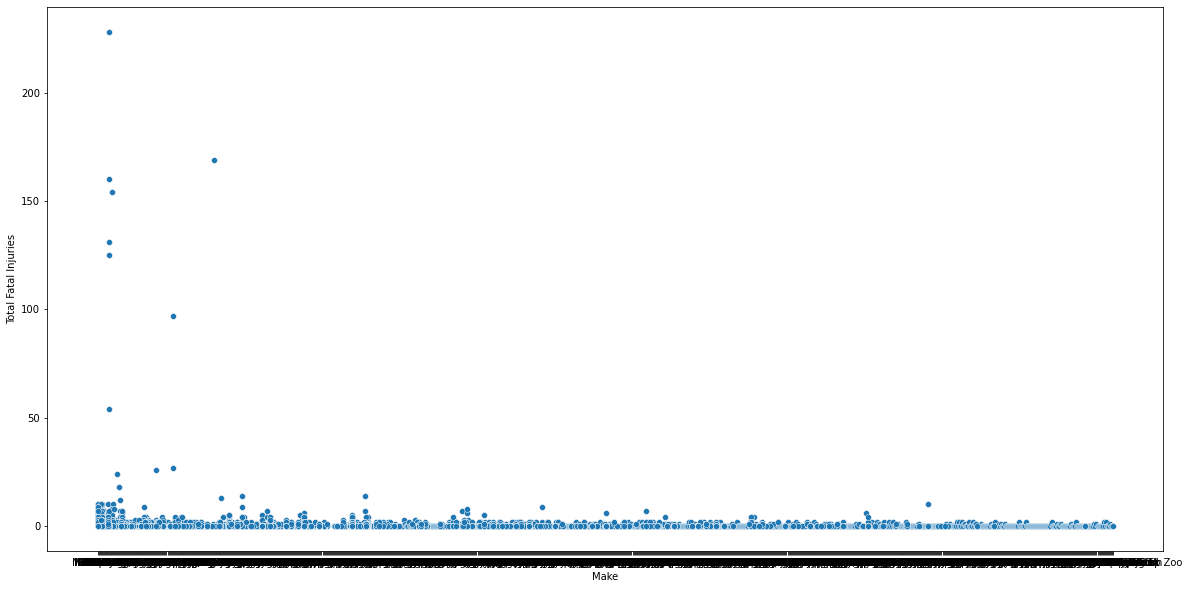

In [82]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = 'Make', y = 'Total Fatal Injuries', data = df, ax = ax)

In [72]:

df['Number Of Engines'] = df['Number Of Engines'].fillna(df['Number Of Engines'].mean())
df['Number Of Engines'].isna().value_counts()

False    20131
Name: Number Of Engines, dtype: int64

In [73]:
df['Total Fatal Injuries'].isna().value_counts()

False    17595
True      2536
Name: Total Fatal Injuries, dtype: int64

In [83]:
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(df['Total Fatal Injuries'].mean())

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2783 entries, 80 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                2783 non-null   object 
 1   Investigation Type      2783 non-null   object 
 2   Accident Number         2783 non-null   object 
 3   Event Date              2783 non-null   object 
 4   Location                2783 non-null   object 
 5   Country                 2783 non-null   object 
 6   Injury Severity         2783 non-null   object 
 7   Aircraft Damage         2783 non-null   object 
 8   Aircraft Category       2783 non-null   object 
 9   Make                    2783 non-null   object 
 10  Model                   2777 non-null   object 
 11  Amateur Built           2783 non-null   object 
 12  Number Of Engines       2783 non-null   object 
 13  Engine Type             2783 non-null   object 
 14  Far Description         2783 non-null 

In [128]:
df['Model'].isna().value_counts()

False    2777
True        6
Name: Model, dtype: int64

In [85]:
df['Model'].fillna('Unknown', axis=0, inplace=True)

In [86]:
df['Model'].isna().value_counts()

False    20131
Name: Model, dtype: int64

In [92]:
df['Total Serious Injuries'].ffill(axis=0, inplace=True)
df['Total Serious Injuries'].isna().value_counts()

False    20131
Name: Total Serious Injuries, dtype: int64

In [91]:
df['Total Minor Injuries'].ffill(axis=0, inplace=True)
df['Total Minor Injuries'].isna().value_counts()

False    20131
Name: Total Minor Injuries, dtype: int64

In [90]:
df['Total Uninjured'].ffill(axis=0,inplace=True)
df['Total Uninjured'].isna().value_counts()

False    20131
Name: Total Uninjured, dtype: int64

In [96]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Minor Injuries'] + df['Total Serious Injuries'] + df['Total Uninjured']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 7 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20131 non-null  object        
 1   Investigation Type      20131 non-null  object        
 2   Accident Number         20131 non-null  object        
 3   Event Date              20131 non-null  datetime64[ns]
 4   Location                20131 non-null  object        
 5   Country                 20131 non-null  object        
 6   Airport Name            14229 non-null  object        
 7   Injury Severity         20131 non-null  object        
 8   Aircraft Damage         20131 non-null  object        
 9   Aircraft Category       20131 non-null  object        
 10  Make                    20131 non-null  object        
 11  Model                   20131 non-null  object        
 12  Amateur Built           20126 non-null  object

In [97]:
df.drop(['Report Status'], axis = 1, inplace=True)


In [101]:
df['Broad Phase Of Flight'] = df['Broad Phase Of Flight'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 7 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20131 non-null  object        
 1   Investigation Type      20131 non-null  object        
 2   Accident Number         20131 non-null  object        
 3   Event Date              20131 non-null  datetime64[ns]
 4   Location                20131 non-null  object        
 5   Country                 20131 non-null  object        
 6   Airport Name            14229 non-null  object        
 7   Injury Severity         20131 non-null  object        
 8   Aircraft Damage         20131 non-null  object        
 9   Aircraft Category       20131 non-null  object        
 10  Make                    20131 non-null  object        
 11  Model                   20131 non-null  object        
 12  Amateur Built           20126 non-null  object

In [102]:
df['Weather Condition'].isna().value_counts()

False    19488
True       643
Name: Weather Condition, dtype: int64

In [103]:
df['Weather Condition'].fillna('Unknown', axis=0, inplace=True)

In [106]:
df['Airport Name'] = df['Airport Name'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 7 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20131 non-null  object        
 1   Investigation Type      20131 non-null  object        
 2   Accident Number         20131 non-null  object        
 3   Event Date              20131 non-null  datetime64[ns]
 4   Location                20131 non-null  object        
 5   Country                 20131 non-null  object        
 6   Airport Name            20131 non-null  object        
 7   Injury Severity         20131 non-null  object        
 8   Aircraft Damage         20131 non-null  object        
 9   Aircraft Category       20131 non-null  object        
 10  Make                    20131 non-null  object        
 11  Model                   20131 non-null  object        
 12  Amateur Built           20126 non-null  object

In [107]:
df['Country'].value_counts()

United States     19335
Brazil              115
France               47
Mexico               46
United Kingdom       45
                  ...  
Romania               1
South Korea           1
Paraguay              1
Qatar                 1
Czech Republic        1
Name: Country, Length: 105, dtype: int64

In [108]:
df = df.drop(['Accident Number'], axis=1)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20131 entries, 7 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                20131 non-null  object        
 1   Investigation Type      20131 non-null  object        
 2   Event Date              20131 non-null  datetime64[ns]
 3   Location                20131 non-null  object        
 4   Country                 20131 non-null  object        
 5   Airport Name            20131 non-null  object        
 6   Injury Severity         20131 non-null  object        
 7   Aircraft Damage         20131 non-null  object        
 8   Aircraft Category       20131 non-null  object        
 9   Make                    20131 non-null  object        
 10  Model                   20131 non-null  object        
 11  Amateur Built           20126 non-null  object        
 12  Number Of Engines       20131 non-null  float6

In [112]:
df.dropna(subset=['Amateur Built'], axis=0, inplace=True)

In [113]:
df['Amateur Built'].isna().value_counts()

False    20126
Name: Amateur Built, dtype: int64

In [116]:
df[['Total Passengers', 'Make', 'Model']].value_counts().head(5)

Total Passengers  Make             Model      
1.0               Cessna           172            359
2.0               Cessna           172            239
1.0               Cessna           152            230
                                   150            121
                                   172S           112
                                                 ... 
3.0               Lake             LA-4             1
                                   LA4              1
                  Lancair          LC41-550FG       1
                  Lancair Company  LC 40 550FG      1
0.0               Air Tractor      AT802A           1
Length: 6897, dtype: int64